In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_dos(volume):
    
    arquivo = './dos/dos_{0}.xml'.format(volume)
    with open(arquivo,'r') as f:
        lines = f.readlines()

    dos_s = []
    dos_p = []
    dos_d = []
    dos_f = []
    dos_g = []
    acquiring_curve = False
    for n, line in enumerate(lines):
        #get curves
        if ('</diagram>' in  line) and acquiring_curve:
            acquiring_curve = False
            #soma curva do orbital s
            if l==0:
                if len(dos_s)==0:
                    dos_s = np.zeros(np.shape(curve))
                    dos_s[:,0] = np.array(curve)[:,0]
                dos_s[:,1] = dos_s[:,1]+np.array(curve)[:,1]
                
            #soma curva do orbital p
            elif l==1:
                if len(dos_p)==0:
                    dos_p = np.zeros(np.shape(curve))
                    dos_p[:,0] = np.array(curve)[:,0]
                dos_p[:,1] = dos_p[:,1]+np.array(curve)[:,1]
                
            #soma curva do orbital d
            elif l==2:
                if len(dos_d)==0:
                    dos_d = np.zeros(np.shape(curve))
                    dos_d[:,0] = np.array(curve)[:,0]
                dos_d[:,1] = dos_d[:,1]+np.array(curve)[:,1]
            
            #soma curva do orbital f
            elif l==3:
                if len(dos_f)==0:
                    dos_f = np.zeros(np.shape(curve))
                    dos_f[:,0] = np.array(curve)[:,0]
                dos_f[:,1] = dos_f[:,1]+np.array(curve)[:,1]
                
            #soma curva do orbital g
            elif l==4:
                if len(dos_g)==0:
                    dos_g = np.zeros(np.shape(curve))
                    dos_g[:,0] = np.array(curve)[:,0]
                dos_g[:,1] = dos_g[:,1]+np.array(curve)[:,1]
            
        
        if acquiring_curve:
            a = line.split('"')
            curve.append([float(a[1]), float(a[3])])
        
        if '<diagram nspin=' in line:
            l = int(line.split()[-2].split('"')[-2])
            acquiring_curve = True
            curve = []
    
    total_dos = []
    acquiring_curve = False
    for n, line in enumerate(lines):
        #get curves
        if '<diagram type="totaldos' in lines[n-1]:
            acquiring_curve = True
            curve = []
            
        if '</diagram>'in line and acquiring_curve:
            acquiring_curve = False
            total_dos.append(curve)
        if acquiring_curve:
            a = line.split('"')
            curve.append([float(a[1]), float(a[3])])
            
    
    total_dos = np.array(total_dos)
    dos_up = total_dos[0,:,1]
    dos_down = total_dos[1,:,1]
    total_dos = np.array([total_dos[0,:,0], total_dos[0,:,1] + total_dos[1,:,1] ]).T #soma spin up(0) e down(1)
    
    
    dos_inters = []
    acquiring_curve = False
    for n, line in enumerate(lines):
        #get curves
        if '<diagram type="interstitial"' in lines[n-1]:
            acquiring_curve = True
            curve = []
            
        if '</diagram>'in line and acquiring_curve:
            acquiring_curve = False
            dos_inters.append(curve)
        if acquiring_curve:
            a = line.split('"')
            curve.append([float(a[1]), float(a[3])])
            
    
    dos_inters = np.array(dos_inters)
    dos_inters = np.array([dos_inters[0,:,0], dos_inters[0,:,1] + dos_inters[1,:,1] ]).T #soma spin up(0) e down(1)
    
    return dos_s, dos_p, dos_d, dos_f, dos_g, total_dos, dos_inters

In [31]:

def plot_dos(volume):
    
    efermi = 0.0
    
    
    dos_s, dos_p, dos_d, dos_f, dos_g, total_dos, dos_inters = read_dos(volume)
    
    #plot
    plt.rc('font', family='QuattroCento Sans')
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=18)
    plt.rc('axes', labelsize=20)
    plt.rc('mathtext', rm='Quattrocento Sans',it='Quattrocento Sans:italic', bf='Quattrocento Sans:bold', fontset='custom' )
    
    fig = plt.figure(figsize=(5,12), dpi=100)
    
    #############################################################
    #DENSITY OF STATES
    
    #Pega limites 
    xmax = total_dos[-1,0]
    xmin = total_dos[0,0]
    ymin_dos = 0.0001
    ymax_dos = 100.0
    
    ax2 = plt.subplot(1, 1, 1)
    ax2.plot(total_dos[:,0], total_dos[:,1], color = 'C7', label = 'Total')
    ax2.fill_between(total_dos[:,1],total_dos[:,0],alpha=0.2, color = 'C7')
    ax2.plot(dos_inters[:,1], dos_inters[:,0], color = 'C4', label='Interstitial')
    ax2.plot(dos_s[:,1]+dos_p[:,1]+dos_d[:,1]+dos_f[:,1]+dos_g[:,1], total_dos[:,0],
         color = 'C1', label = '$\Sigma_\ell$')
    ax2.tick_params(axis = 'y', direction = 'in')
    ax2.hlines(efermi,xmin_dos,xmax_dos, color='k', alpha = 0.5, linestyle = '--')
    ax2.set_xlabel('DOS')
    ax2.set_xlim(xmin_dos, xmax_dos)
    ax2.legend(fontsize=14)
    plt.setp(ax2.get_yticklabels(), visible=False)
    
    plt.tight_layout()
    plt.show()

array([[[-0.5       ,  2.94040687],
        [-0.498     ,  2.05256464],
        [-0.496     ,  1.07242902],
        ...,
        [ 0.494     ,  0.        ],
        [ 0.496     ,  0.        ],
        [ 0.498     ,  0.        ]],

       [[-0.5       ,  2.94040686],
        [-0.498     ,  2.05256464],
        [-0.496     ,  1.07242902],
        ...,
        [ 0.494     ,  0.        ],
        [ 0.496     ,  0.        ],
        [ 0.498     ,  0.        ]]])

NameError: name 'dos_xy' is not defined

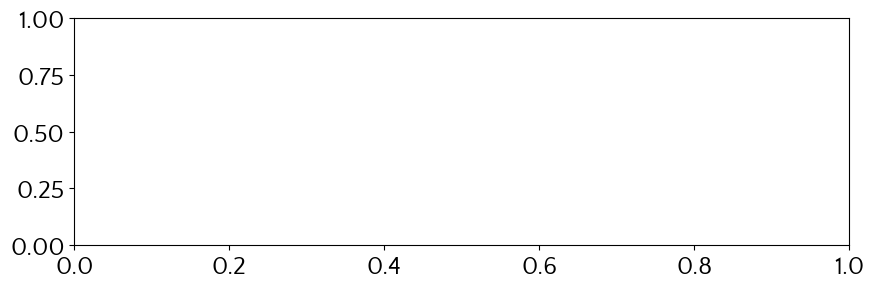

In [8]:
plt.rc('font', family='QuattroCento Sans')
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=20)
plt.rc('mathtext', rm='Quattrocento Sans',it='Quattrocento Sans:italic', bf='Quattrocento Sans:bold', fontset='custom' )

fig = plt.figure(figsize=(10,3), dpi=100)
ax1 = fig.add_subplot()

#get x limits from data
xmin,xmax = dos_xy[0,0,0],dos_xy[0,-1,0]

#draw curves
for i in range(np.shape(dos_xy)[0]):
    ax1.plot(dos_xy[i,:,0], dos_xy[i,:,1], color='firebrick')
ax1.fill_between(dos_xy[i,:,0],dos_xy[i,:,1],color='firebrick',alpha=0.2)

#get y limits for later
ymin,ymax = plt.ylim()

#draw fermi level
ax1.plot([efermi,efermi],[ymin,ymax], color='k', alpha = 0.5, linestyle = '--')
ax1.annotate('E$_\mathrm{F}$', xy = (0,ymax-4), fontsize=20)

#draw high symmetry lines
#ax1.vlines(labels_coords, ymin, ymax, color='k', linewidth = 0.5)

#adjust limits

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(0, ymax)
ax1.set_ylabel('DOS (states/Ha/cell)')
ax1.set_xlabel('Energy (Ha)')


#plt.savefig(arquivo.split('.')[0]+'.pdf')
plt.show()

In [9]:
def plot_dos(volume):
    arquivo = './dos/Re_{0}_dos.agr'.format(volume)
    
    #load file
    with open(arquivo,'r') as f:
        lines = f.readlines()
    
    #get fermi energy
    with open('./dos/EFERMI_{0}.OUT.1'.format(volume), 'r') as f:
        efermi = float(f.readlines()[0])
    print('Volume =', volume,'E_fermi =', efermi)
    
    #get DOS curves
    dos_xy = []
    acquiring_curve = False
    for n, line in enumerate(lines):
        #get curves
        if '@type xy' in lines[n-1]:
            acquiring_curve = True
            curve = []
        if '&'in line:
            acquiring_curve = False
            dos_xy.append(curve)
        if acquiring_curve:
            curve.append([float(x) for x in line.split()])
    dos_xy = np.array(dos_xy)
    
    #PLOT
    plt.rc('font', family='QuattroCento Sans')
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=18)
    plt.rc('axes', labelsize=20)
    plt.rc('mathtext', rm='Quattrocento Sans',it='Quattrocento Sans:italic', bf='Quattrocento Sans:bold', fontset='custom' )
    
    fig = plt.figure(figsize=(10,3), dpi=100)
    ax1 = fig.add_subplot()
    
    #get x limits from data
    xmin,xmax = dos_xy[0,0,0],dos_xy[0,-1,0]
    
    #draw curves
    for i in range(np.shape(dos_xy)[0]):
        ax1.plot(dos_xy[i,:,0], dos_xy[i,:,1], color='firebrick')
    ax1.fill_between(dos_xy[i,:,0],dos_xy[i,:,1],color='firebrick',alpha=0.2)
    
    #get y limits for later
    ymin,ymax = plt.ylim()
    
    #draw fermi level
    ax1.plot([efermi,efermi],[ymin,ymax], color='k', alpha = 0.5, linestyle = '--')
    #ax1.annotate('E$_\mathrm{F}$', xy = (0,ymax-4), fontsize=20)
    ax1.annotate('V = {0} bohr$^3$\nE$_F$ = {1}'.format(volume,efermi), 
                 xycoords = 'axes fraction', xy=(0.02, 0.95),
                 fontsize=16,
                 horizontalalignment='left',
                 verticalalignment='top')
    
    
    #adjust limits
    
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(0, ymax)
    ax1.set_ylabel('DOS (states/Ha/cell)')
    ax1.set_xlabel('Energy (Ha)')
    
    
    #plt.savefig(arquivo.split('.')[0]+'.pdf')
    plt.show()

Volume = 90 E_fermi = 1.829265711


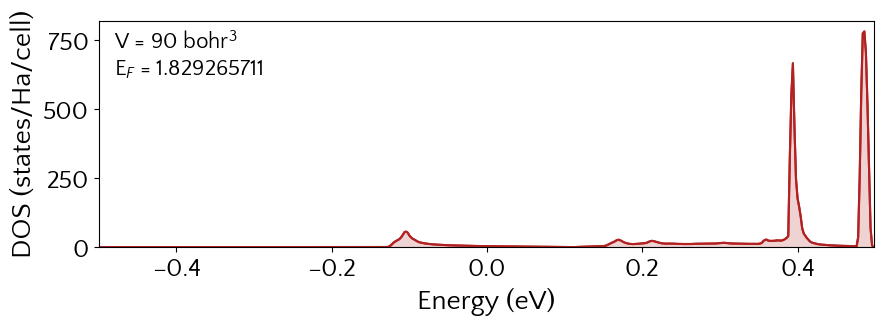

In [66]:
V = [90]
for v in V:
    plot_dos(v)

# Código para GIF

In [1]:
import imageio

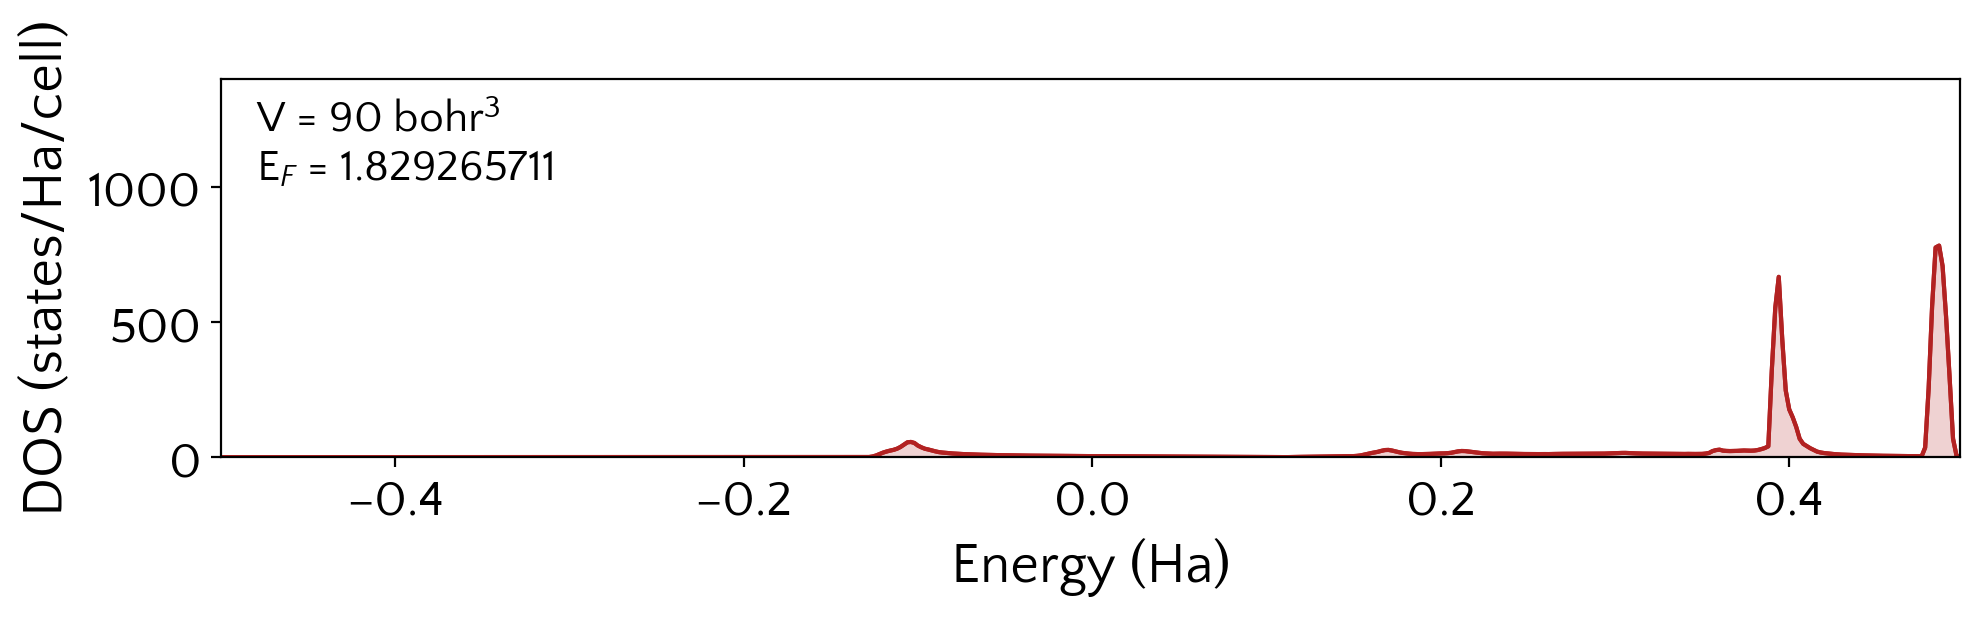

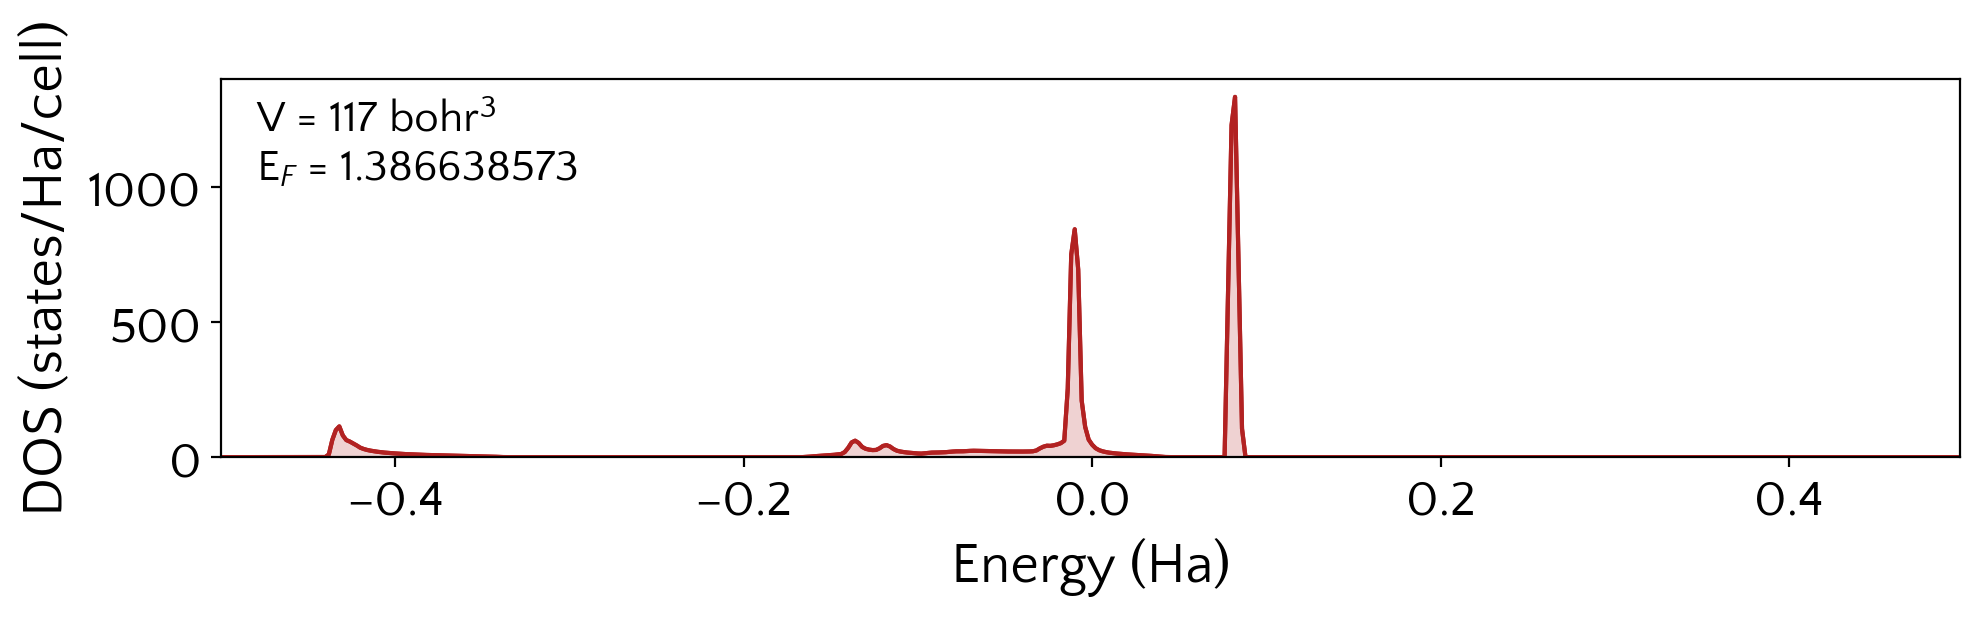

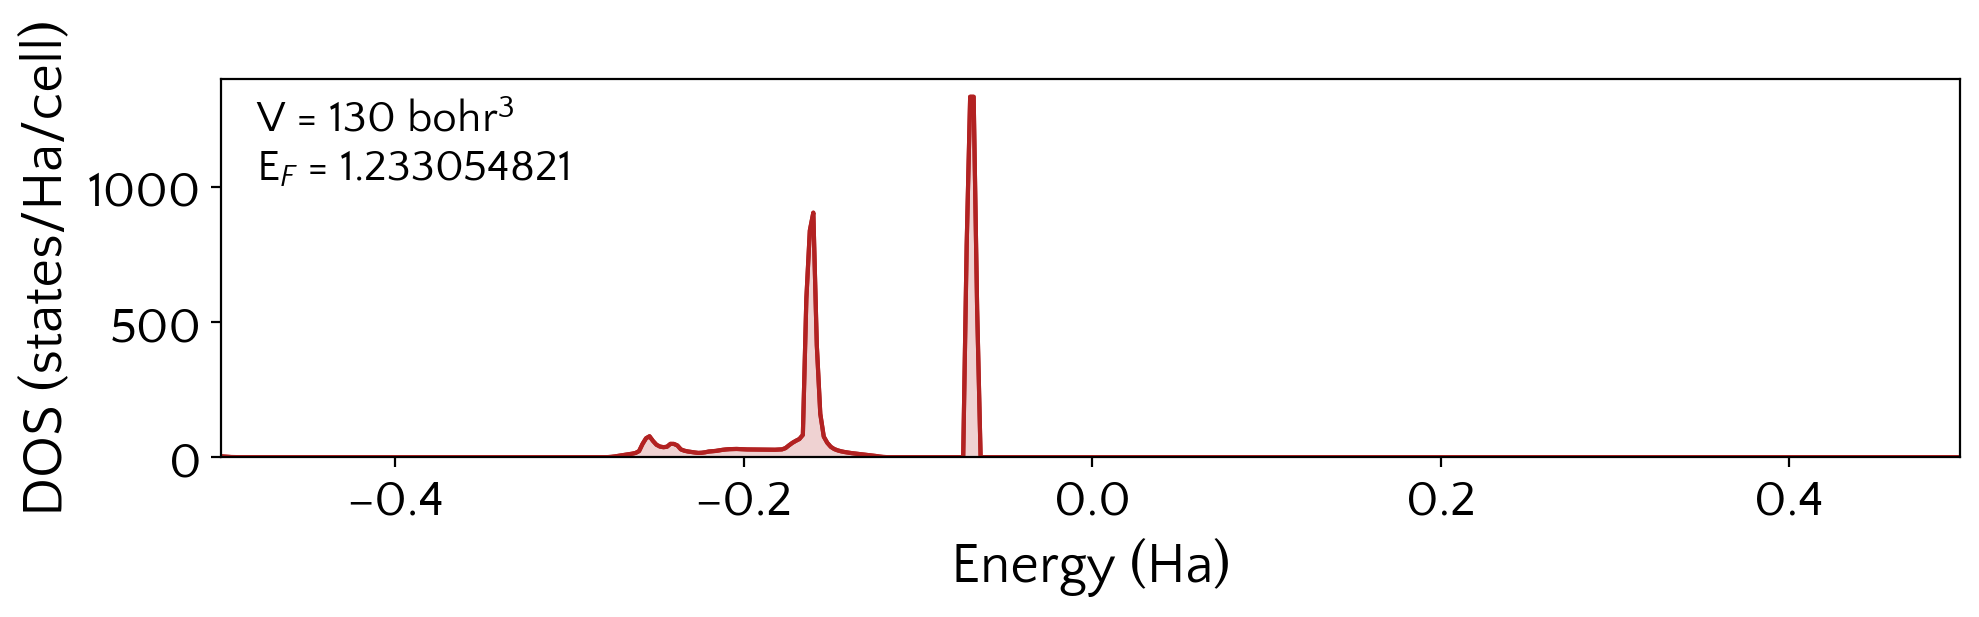

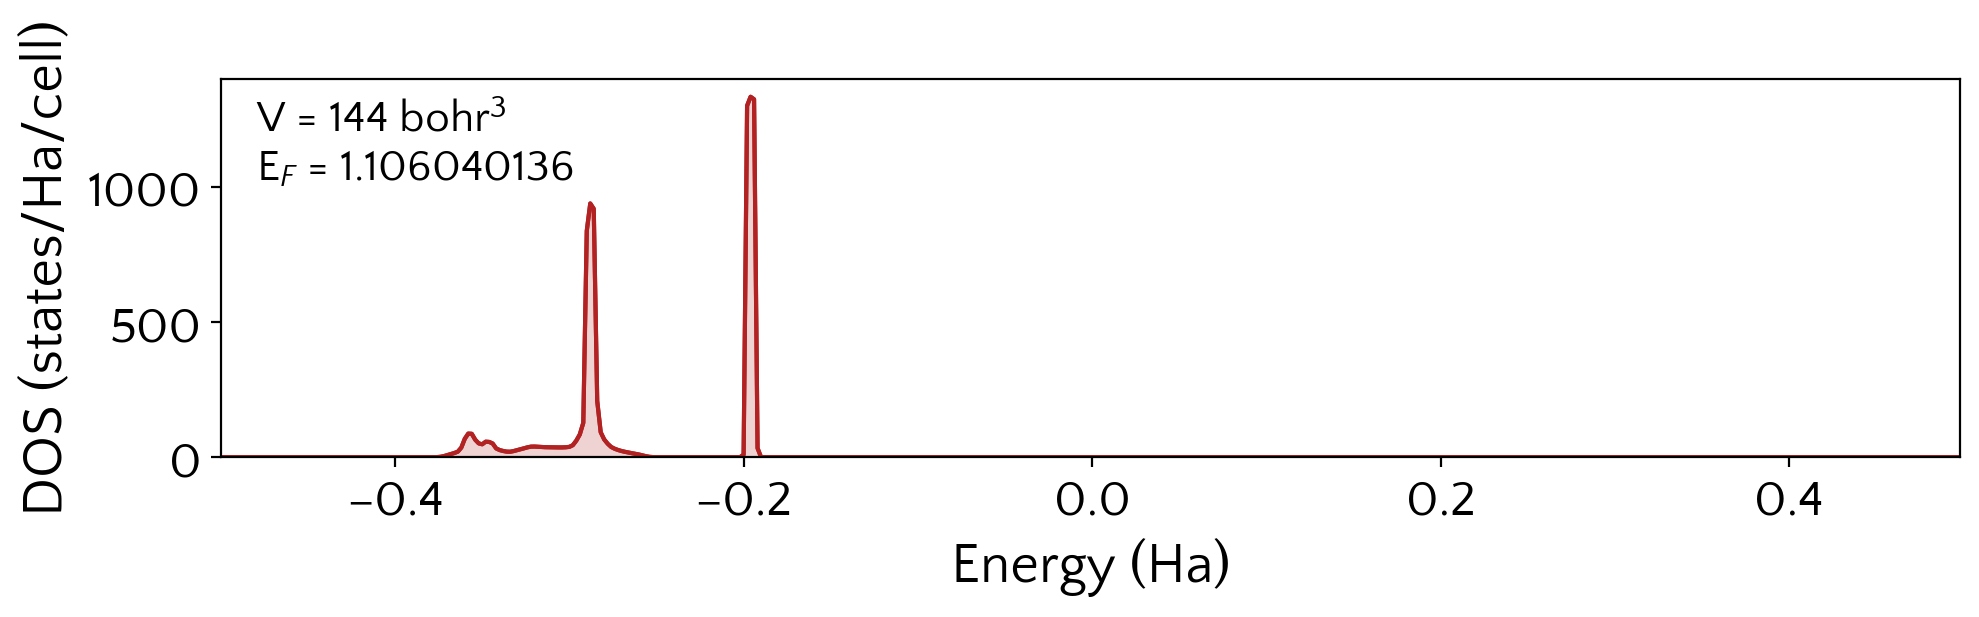

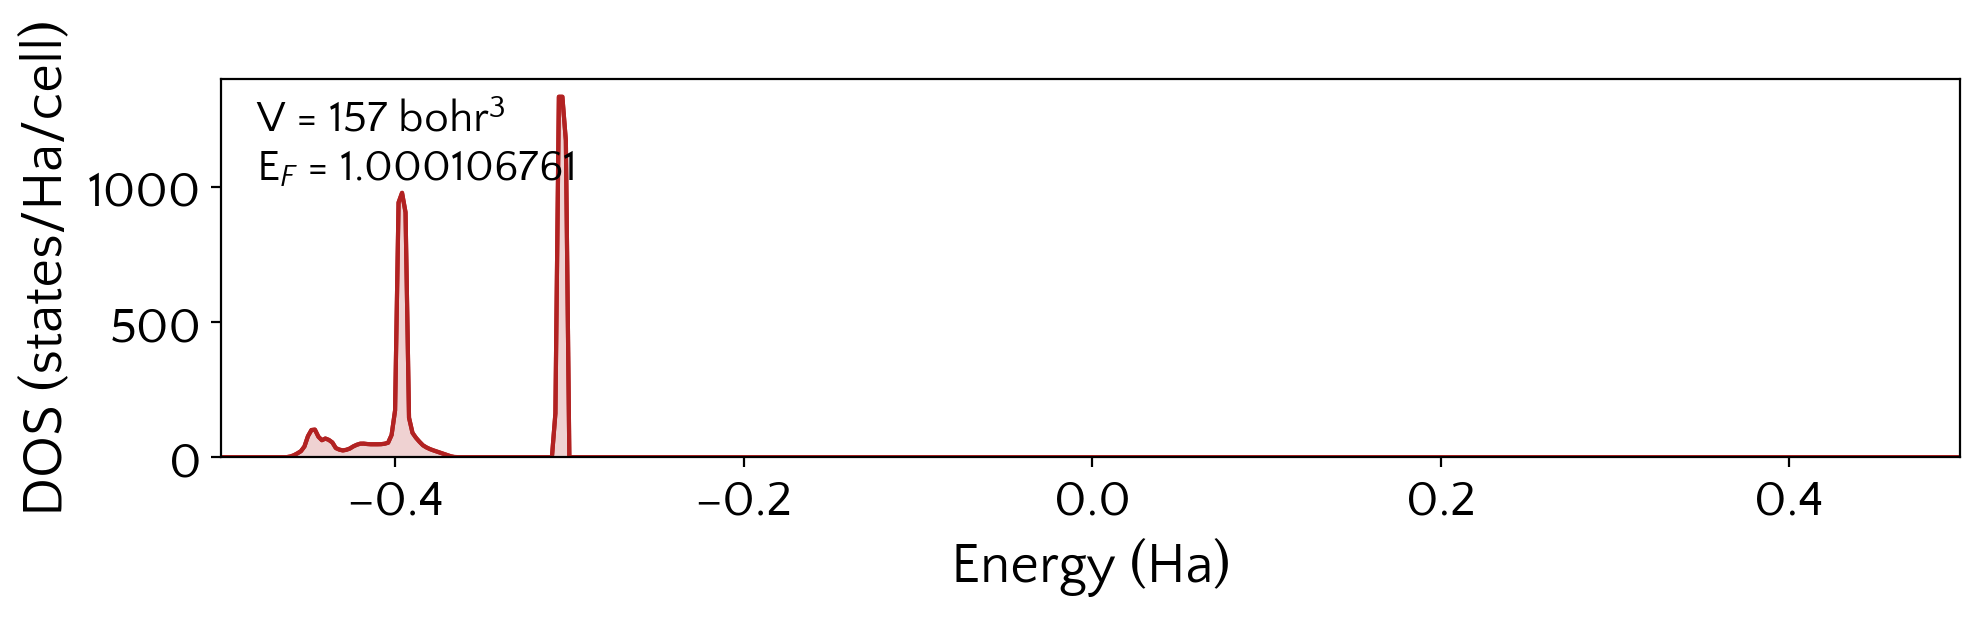

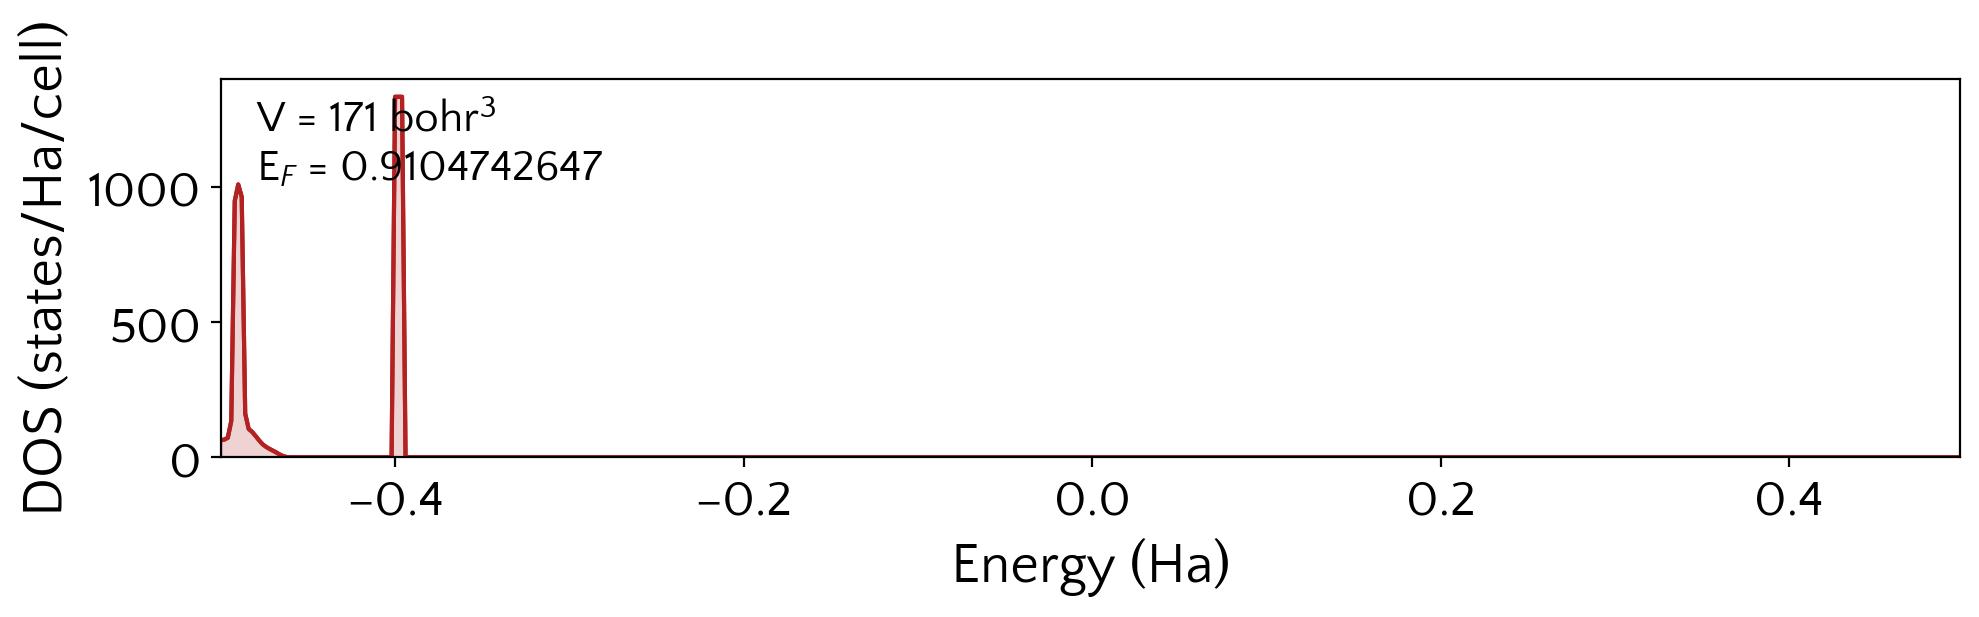

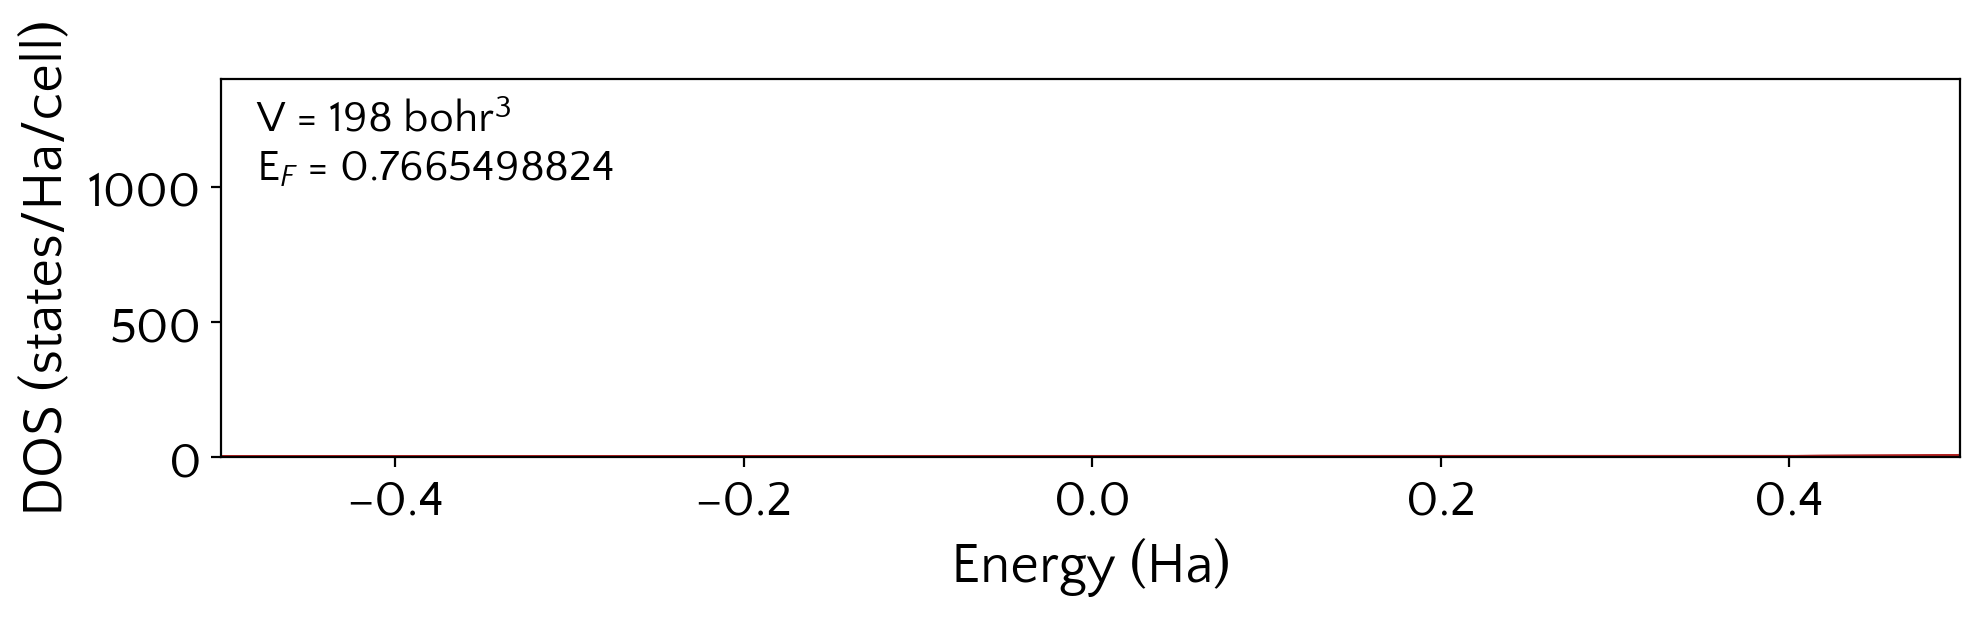

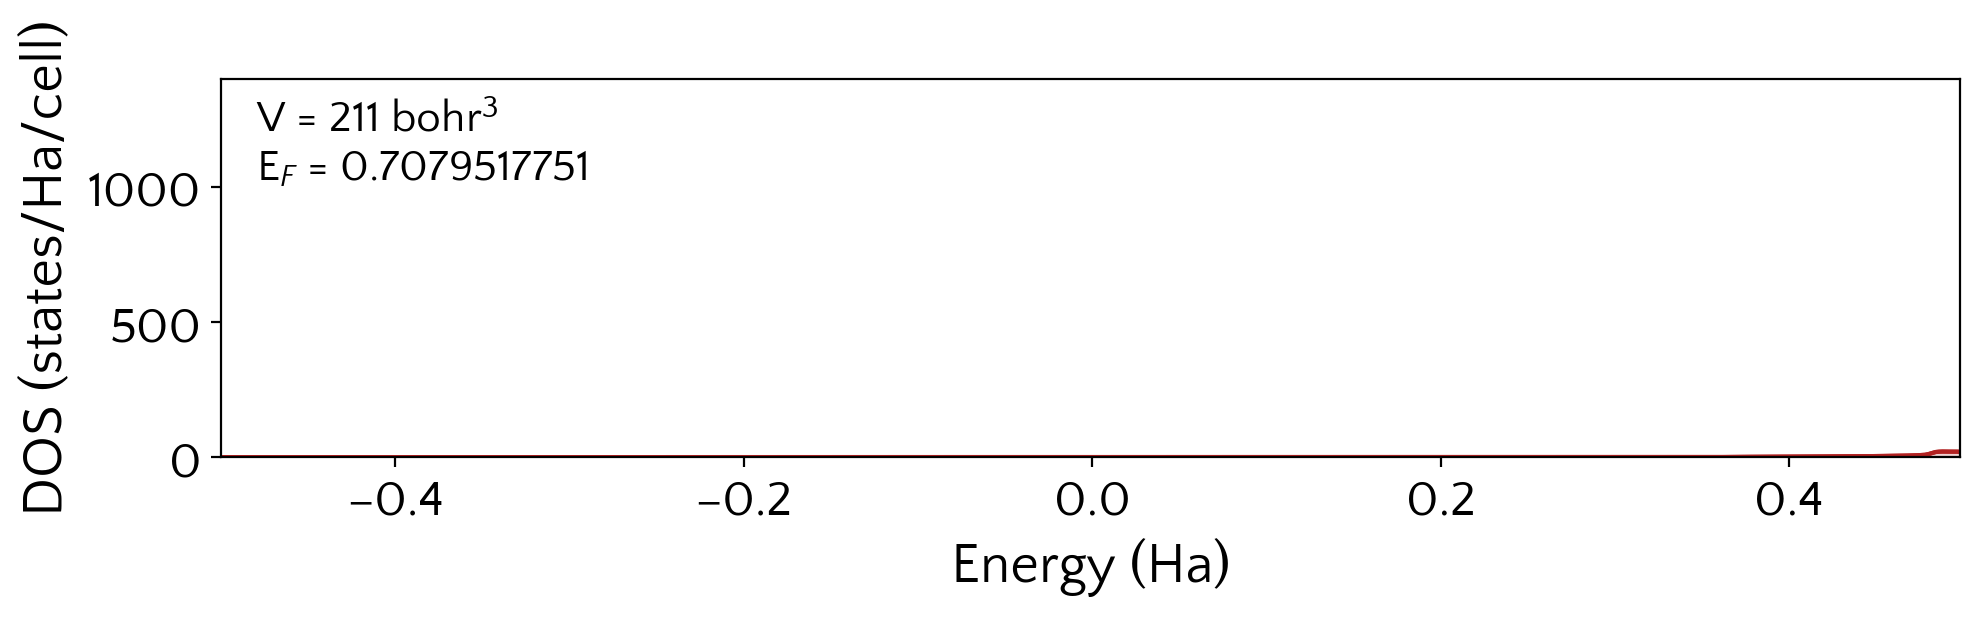

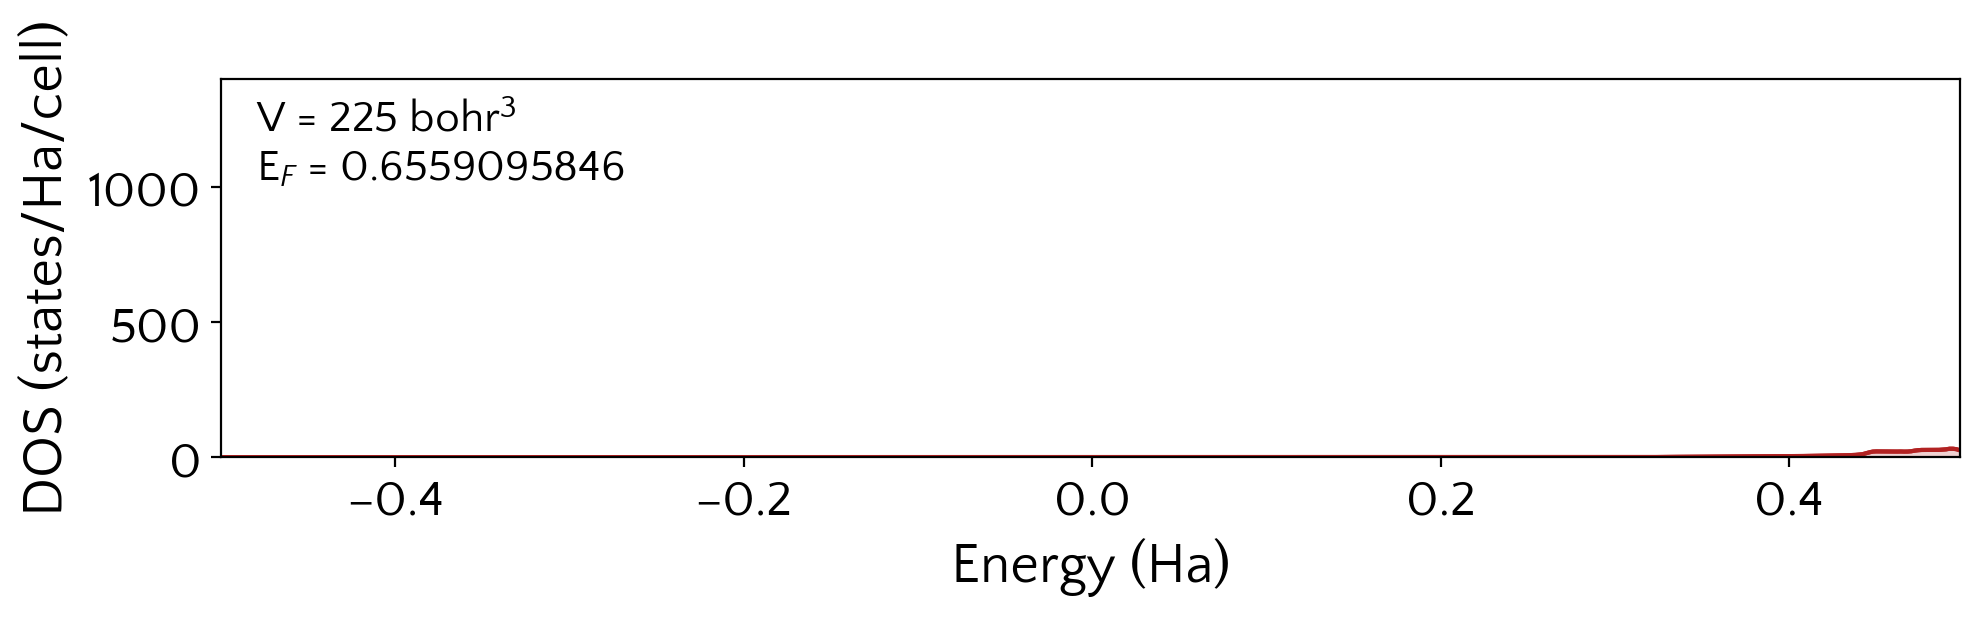

In [10]:
def plot_dos_gif(volume):
    arquivo = './dos/Re_{0}_dos.agr'.format(volume)
    
    #load file
    with open(arquivo,'r') as f:
        lines = f.readlines()
    
    #get fermi energy
    with open('./dos/EFERMI_{0}.OUT.1'.format(volume), 'r') as f:
        efermi = float(f.readlines()[0])
    #print('Volume =', volume,'E_fermi =', efermi)
    
    #get DOS curves
    dos_xy = []
    acquiring_curve = False
    for n, line in enumerate(lines):
        #get curves
        if '@type xy' in lines[n-1]:
            acquiring_curve = True
            curve = []
        if '&'in line:
            acquiring_curve = False
            dos_xy.append(curve)
        if acquiring_curve:
            curve.append([float(x) for x in line.split()])
    dos_xy = np.array(dos_xy)
    
    #PLOT
    plt.rc('font', family='QuattroCento Sans')
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=18)
    plt.rc('axes', labelsize=20)
    plt.rc('mathtext', rm='Quattrocento Sans',it='Quattrocento Sans:italic', bf='Quattrocento Sans:bold', fontset='custom' )
    
    fig = plt.figure(figsize=(10,3), dpi=200)
    ax1 = fig.add_subplot()
    
    #get x limits from data
    xmin,xmax = dos_xy[0,0,0],dos_xy[0,-1,0]
    
    #draw curves
    for i in range(np.shape(dos_xy)[0]):
        ax1.plot(dos_xy[i,:,0], dos_xy[i,:,1], color='firebrick')
    ax1.fill_between(dos_xy[i,:,0],dos_xy[i,:,1],color='firebrick',alpha=0.2)
    
    #get y limits for later
    #ymin,ymax = plt.ylim()
    ymin, ymax = 0,1400
    
    #draw fermi level
    ax1.plot([efermi,efermi],[ymin,ymax], color='k', alpha = 0.5, linestyle = '--')
    #ax1.annotate('E$_\mathrm{F}$', xy = (0,ymax-4), fontsize=20)
    ax1.annotate('V = {0} bohr$^3$\nE$_F$ = {1}'.format(volume,efermi), 
                 xycoords = 'axes fraction', xy=(0.02, 0.95),
                 fontsize=16,
                 horizontalalignment='left',
                 verticalalignment='top')
    
    
    #adjust limits
    
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(0, ymax)
    ax1.set_ylabel('DOS (states/Ha/cell)')
    ax1.set_xlabel('Energy (Ha)')
    plt.tight_layout()
    
    
    #plt.savefig(arquivo.split('.')[0]+'.pdf')
    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    return image
    
kwargs_write = {'fps':1.0, 'quantizer':'nq'}

Volumes = [90,117,130,144,157,171,198,211,225]
imageio.mimsave('./dos.gif', [plot_dos_gif(i) for i in Volumes], fps=1)